In [89]:
import csv
import random
import math
import operator

In [121]:
def loadDataset(filename, testSet=[],dataset=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(1,len(dataset)-1):
            dataset[x][0] = float(dataset[x][0])
            dataset[x][1] =float(dataset[x][1])
            testSet.append(dataset[x])
        return testSet

In [122]:
def loadTrainingDataset(filename, testSet=[],dataset=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(1,len(dataset)-1):
            dataset[x][0] = float(dataset[x][0])
            dataset[x][1] =float(dataset[x][1])
            testSet.append(dataset[x])
        return testSet

In [123]:
#  Eucladian distance .squared and root of the value

In [124]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [125]:
# gets the nearrest neighbors in all based on the value of k 
# imp note . K is the value which depends on overfit or underfit. determine the ideal value for k (work on this)

In [176]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [127]:
# response is the value in neighbors.  Get the most repeated and the top one. which is very nearest to the input given from the test data

In [128]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [129]:
# differentiate  testset and predictions

In [130]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [131]:
    trainingSet=[]
    dataset = []
    testSet=[]
    predictions = []
    k = 3
    testSet = loadDataset('01-test1.csv', testSet,dataset)
    trainingSet = loadTrainingDataset('01-train.csv', trainingSet,dataset)
    print ('Test set: ' + repr(len(testSet)))
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        #print(result)
        #print('neighbors')
        #print(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))


Test set: 29
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=2.0
> predicted=3.0, actual=4.0
> predicted=3.0, actual=2.0
> predicted=3.0, actual=3.0
> predicted=4.0, actual=1.0
> predicted=4.0, actual=2.0
> predicted=4.0, actual=1.0
> predicted=4.0, actual=1.0
> predicted=4.0, actual=1.0
> predicted=1.0, actual=2.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=3.0, actual=3.0
> predicted=1.0, actual=4.0
> predicted=4.0, actual=4.0
> predicted=4.0, actual=4.0
> predicted=4.0, actual=4.0
> predicted=1.0, actual=4.0


In [107]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 62.06896551724138%


In [136]:
print(trainingSet)

TypeError: list indices must be integers or slices, not tuple

In [133]:
import pandas as pd
data = pd.read_csv("01-train.csv")
#print(data)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data.iloc[:,0:2], data['Colour'])

# Predicted class
sklearnPred = neigh.predict(testSet)
print(sklearnPred)

[3 3 3 3 3 3 4 4 4 4 4 1 3 3 3 3 3 3 3 3 3 3 3 3 1 4 4 4 1]


In [132]:
print(predictions)

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 4.0, 1.0]


In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:
x=[]
y=[]
z= []
for i in trainingSet:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])

In [199]:
xTrain=[]
yTrain=[]
xTest=[]
yTest=[]
z= []
for i in testSet:
    xTrain.append(i[0])
    yTrain.append(i[1])
for j in trainingSet:
    xTest.append(j[0])
    yTest.append(j[1])
print(xTrain)
print(yTrain)
print(xTest)
print(yTest)

[319.5, 316.4, 298.6, 315.1, 324.0, 292.2, 358.2, 413.6, 367.1, 363.2, 418.5, 360.8, 362.5, 363.0, 392.8, 369.6, 403.8, 342.6, 287.4, 294.0, 276.6, 274.0, 283.1, 321.1, 313.2, 292.3, 312.9, 315.2, 279.1, 316.4, 344.2, 359.0, 337.5, 380.7, 382.6, 376.6, 360.5, 374.6, 369.9, 387.8, 369.2, 392.4, 280.2, 316.4, 306.5, 295.2, 300.8, 321.5, 315.1, 298.5, 309.0, 304.9, 297.7, 330.5, 375.1, 395.9, 362.6, 393.4, 373.4, 400.1, 315.3, 309.0, 297.9, 311.5, 301.7, 331.9, 386.4, 377.5, 384.1, 392.0, 376.2]
[3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[303.0, 370.0, 298.0, 277.0, 377.0, 299.0, 382.0, 374.0, 303.0, 309.0, 359.0, 366.0, 311.0, 302.0, 373.0, 305.0]
[3.0, 1.0, 3.0, 3.0, 4.0, 3.0, 1.

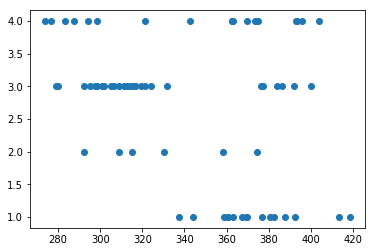

In [200]:

plt.scatter(xTrain,yTrain)

plt.show()

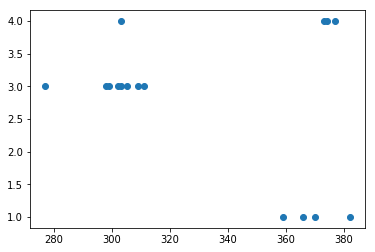

In [201]:
plt.scatter(xTest,yTest)
plt.show()

In [ ]:
## With Test set 2

In [164]:
    trainingSet=[]
    dataset = []
    testSet=[]
    predictions = []
    k = 3
    testSet = loadDataset('01-test2.csv', testSet,dataset)
    trainingSet = loadTrainingDataset('01-train.csv', trainingSet,dataset)
    print ('Test set: ' + repr(len(testSet)))
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        #print(result)
        #print('neighbors')
        #print(neighbors)
        predictions.append(result)
        #print('predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

Test set: 71
Accuracy: 54.929577464788736%


In [170]:
# With k= 1 ,5 17
#Accuracy = [59.154929577464785%,59.154929577464785%]
# We were trying to evaluate the shortest distance between 17 neighbours when there were only 16 in the trainingdata set.

In [185]:
    trainingSet=[]
    dataset = []
    testSet=[]
    predictions = []
    k = 17
    testSet = loadDataset('01-test2.csv', testSet,dataset)
    trainingSet = loadTrainingDataset('01-train.csv', trainingSet,dataset)
    print ('Test set: ' + repr(len(testSet)))
    print ('Training set: ' + repr(len(trainingSet)))
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        #print(result)
        #print('neighbors')
        #print(neighbors)
        predictions.append(result)
        #print('predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    Accuracy.append(getAccuracy(testSet, predictions))
    print('Accuracy: ' + repr(Accuracy[0]) + '%')

Test set: 71
Training set: 16
16


IndexError: list index out of range